# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #2369ae; text-align: center; line-height: 1.25;"><b> Russian world export<span style="color: #000000"> </span></b></h1>


In [474]:
try :
    import circlify
except :
    !pip install circlify

import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> About Dataset</div>

+    The data contains Exports made by Russia to the world
+    i. 225 Partnering countries
+    ii. ~3000 unique commodities Standard International Trade Classification (SITC) Code description

In [477]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [478]:
df = pd.read_csv("RUStoWorldTrade.csv")
iso3 = pd.read_csv("iso3.csv")
partnerAreas = pd.read_csv("partnerAreas.csv")

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384603 entries, 0 to 1384602
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   index              1384603 non-null  int64  
 1   Classification     1384603 non-null  object 
 2   Year               1384603 non-null  int64  
 3   Aggregate Level    1384603 non-null  int64  
 4   Is Leaf Code       1384603 non-null  int64  
 5   Reporter Code      1384603 non-null  int64  
 6   Reporter           1384603 non-null  object 
 7   Reporter ISO       1384603 non-null  object 
 8   Partner Code       1384603 non-null  int64  
 9   Partner            1384603 non-null  object 
 10  Partner ISO        1375914 non-null  object 
 11  Commodity Code     1384603 non-null  object 
 12  Commodity          1384603 non-null  object 
 13  Qty Unit Code      1384603 non-null  int64  
 14  Qty Unit           1384603 non-null  object 
 15  Qty                1283894 non-n

In [480]:
df.head()

,index,Classification,Year,Aggregate Level,Is Leaf Code,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Netweight (kg),Trade Value (US$)
0,0,S4,2011,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,NaN,NaN,75591
1,1,S4,2012,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,NaN,NaN,27778
2,2,S4,2015,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,NaN,NaN,2131579
3,3,S4,2016,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,0.0,0.0,9055543
4,4,S4,2017,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,0.0,0.0,19952598


In [481]:
iso3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Continent  232 non-null    object 
 1   Region     232 non-null    object 
 2   Country    232 non-null    object 
 3   Capital    231 non-null    object 
 4   FIPS       231 non-null    object 
 5   ISO (2)    231 non-null    object 
 6   ISO (3)    232 non-null    object 
 7   ISO (No)   226 non-null    float64
 8   Internet   231 non-null    object 
 9   Note       9 non-null      object 
dtypes: float64(1), object(9)
memory usage: 18.3+ KB


In [482]:
partnerAreas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      292 non-null    int64 
 1   text    292 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [483]:
df = df.convert_dtypes()

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Data pre-processing</div>

Since the data is clean, we use the start code to optimize performance (we will need it with 1.3 million data points). 

| Aggregate Level | Level Name | Code Format | Number of Items |  
| --- | --- | --- | --- |  
| 1 | Section | 0 | 10 Items |  
| 2 | Division | 01 | 67 Items |  
| 3 | Group | 012 | 261 Items |  
| 4 | Subgroup | 012.1 | 1033 Items |  
| 5 | Item | 012.13 | 3121 Items |  


In [487]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384603 entries, 0 to 1384602
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   index              1384603 non-null  Int64  
 1   Classification     1384603 non-null  string 
 2   Year               1384603 non-null  Int64  
 3   Aggregate Level    1384603 non-null  Int64  
 4   Is Leaf Code       1384603 non-null  Int64  
 5   Reporter Code      1384603 non-null  Int64  
 6   Reporter           1384603 non-null  string 
 7   Reporter ISO       1384603 non-null  string 
 8   Partner Code       1384603 non-null  Int64  
 9   Partner            1384603 non-null  string 
 10  Partner ISO        1375914 non-null  string 
 11  Commodity Code     1384603 non-null  object 
 12  Commodity          1384603 non-null  string 
 13  Qty Unit Code      1384603 non-null  Int64  
 14  Qty Unit           1384603 non-null  string 
 15  Qty                1283894 non-n

In [488]:
df.head()

,index,Classification,Year,Aggregate Level,Is Leaf Code,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Netweight (kg),Trade Value (US$)
0,0,S4,2011,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,<NA>,<NA>,75591
1,1,S4,2012,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,<NA>,<NA>,27778
2,2,S4,2015,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,<NA>,<NA>,2131579
3,3,S4,2016,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,0.0,0.0,9055543
4,4,S4,2017,1,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,6,Manufactured goods classified chiefly by material,1,No Quantity,0.0,0.0,19952598


In [489]:
#df = df.drop(axis=1, columns=["index", "Classification", "Is Leaf Code", "Reporter Code", "Reporter"], inplace=True)

Makes sense to keep ISO instead of full names, drop index, classification, is leaf code, reporter code

### Now we will convert the data types form int64 to int32, int16, etc (lower ones)
+ Obvious candidates would be: Commodity Code, Partner Code and other int variables

In [492]:
for col in df.columns:
    if df[col].dtype == 'Float64':
        df[col] = df[col].astype('float16')
    try : 
        if df[col].dtype == 'Int64':
            df[col] = df[col].astype('int16')
    except :
        df[col] = df[col].astype('float16')
df.drop(df[df['Commodity Code'] == 'TOTAL'].index, inplace=True)
df['Commodity Code'] = df['Commodity Code'].astype('float16')

In [493]:
df1 = df[df['Aggregate Level']==2]

## ISO

In [495]:
iso3.head(5)

,Continent,Region,Country,Capital,FIPS,ISO (2),ISO (3),ISO (No),Internet,Note
0,Asia,South Asia,Afghanistan,Kabul,AF,AF,AFG,4.0,AF,NaN
1,Europe,South East Europe,Albania,Tirana,AL,AL,ALB,8.0,AL,NaN
2,Africa,Northern Africa,Algeria,Algiers,AG,DZ,DZA,12.0,DZ,NaN
3,Oceania,Pacific,American Samoa,Pago Pago,AQ,AS,ASM,16.0,AS,NaN
4,Europe,South West Europe,Andorra,Andorra la Vella,AN,AD,AND,20.0,AD,NaN


In [496]:
continents = ['Asia', 'Europe', 'Africa', 'Oceania', 'Americas']

#JOIN
for x in continents:
    y=iso3[iso3["Continent"] == x]
    
    m = df1["Partner ISO"].isin(y["ISO (3)"])
    df1.loc[m, "Continent"] = x
    
Region = ['South Asia', 'South East Europe', 'Northern Africa', 'Pacific',
       'South West Europe', 'Southern Africa', 'West Indies',
       'South America', 'South West Asia', 'Central Europe',
       'Eastern Europe', 'Western Europe', 'Central America',
       'Western Africa', 'South East Asia', 'Central Africa',
       'North America', 'East Asia', 'Indian Ocean', 'Northern Europe',
       'Eastern Africa', 'Southern Europe', 'Central Asia',
       'Northern Asia']

for x in Region:        
    y = iso3[iso3['Region'] == x]
    m = df1['Partner ISO'].isin(y['ISO (3)'])
    df1.loc[m, 'Region'] = x

### Here we are adding iso3's continents and Sub-Continents to df1

In [498]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 79030 entries, 11 to 1384534
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              79030 non-null  int16  
 1   Classification     79030 non-null  string 
 2   Year               79030 non-null  int16  
 3   Aggregate Level    79030 non-null  int16  
 4   Is Leaf Code       79030 non-null  int16  
 5   Reporter Code      79030 non-null  int16  
 6   Reporter           79030 non-null  string 
 7   Reporter ISO       79030 non-null  string 
 8   Partner Code       79030 non-null  int16  
 9   Partner            79030 non-null  string 
 10  Partner ISO        78318 non-null  string 
 11  Commodity Code     79030 non-null  float16
 12  Commodity          79030 non-null  string 
 13  Qty Unit Code      79030 non-null  int16  
 14  Qty Unit           79030 non-null  string 
 15  Qty                31621 non-null  float16
 16  Netweight (kg)     31556

### Here we went form 190MB to 55MB

In [500]:
df1.head()

,index,Classification,Year,Aggregate Level,Is Leaf Code,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Netweight (kg),Trade Value (US$),Continent,Region
11,12,S4,2011,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,65.0,"Textile yarn, fabrics, made-up articles, n.e.s...",1,No Quantity,NaN,NaN,10055,Americas,West Indies
12,13,S4,2012,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,65.0,"Textile yarn, fabrics, made-up articles, n.e.s...",1,No Quantity,NaN,NaN,27778,Americas,West Indies
13,14,S4,2014,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,89.0,"Miscellaneous manufactured articles, n.e.s.",1,No Quantity,NaN,NaN,16098,Americas,West Indies
14,15,S4,2015,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,68.0,Non-ferrous metals,1,No Quantity,NaN,NaN,-31109,Americas,West Indies
15,16,S4,2016,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,68.0,Non-ferrous metals,1,No Quantity,0.0,0.0,11575,Americas,West Indies


<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> Pandas Profiling</div>

In [502]:
!pip install visions==0.7.1

In [503]:
!pip install --upgrade pandas

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> Exploratory Data Analysis</div>

In [505]:
df1.head()

,index,Classification,Year,Aggregate Level,Is Leaf Code,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Netweight (kg),Trade Value (US$),Continent,Region
11,12,S4,2011,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,65.0,"Textile yarn, fabrics, made-up articles, n.e.s...",1,No Quantity,NaN,NaN,10055,Americas,West Indies
12,13,S4,2012,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,65.0,"Textile yarn, fabrics, made-up articles, n.e.s...",1,No Quantity,NaN,NaN,27778,Americas,West Indies
13,14,S4,2014,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,89.0,"Miscellaneous manufactured articles, n.e.s.",1,No Quantity,NaN,NaN,16098,Americas,West Indies
14,15,S4,2015,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,68.0,Non-ferrous metals,1,No Quantity,NaN,NaN,-31109,Americas,West Indies
15,16,S4,2016,2,0,643,Russian Federation,RUS,136,Cayman Isds,CYM,68.0,Non-ferrous metals,1,No Quantity,0.0,0.0,11575,Americas,West Indies


### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;"> I. Trade Value of Russian exports over the years 📅</div>   
Russia is able to maintain a **stable** trade value overall, The trade volumes have been in a **range** of <span style="background-color: #32CD32">5-8 Million USD</span>. The biggest impacts in recent history being: the housing crisis of 2008 and the Crimean annexation of 2014. The 2014 conflict has resulted in sanctions and economic downturn, with the shift from Europe to China occuring. Having a stable Trade <span style="background-color: #32CD32">ensures financial security</span> and helps the nations citizens choose from a variety of options.
___

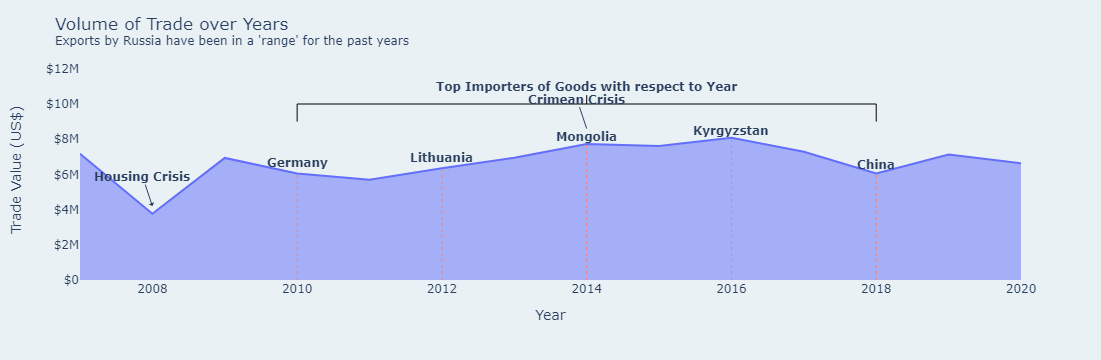

In [507]:
ts = df1.groupby(['Year']).agg({'Trade Value (US$)':'sum'}) ; ts.reset_index(inplace=True)
fig = px.area(ts, x='Year', y='Trade Value (US$)', template='plotly_white')
fig.update_layout(font_family="verdana",font_size=12, paper_bgcolor="#e9f1f5",plot_bgcolor="#e9f1f5",title="Volume of Trade over Years<br><sup>Exports by Russia have been in a 'range' for the past years</sup>")
fig.update_yaxes(tickprefix="$", showgrid=False, range = [0,12500000])


fig.add_annotation(text='<b>Housing Crisis', x='2008', y=4200000, arrowhead=1, showarrow=True)
fig.add_annotation(text='<b>Crimean Crisis', x='2014', y=8600000)
fig.add_shape(
    type='line', line_color='salmon', line_width=1, opacity=1, line_dash='dot',
    x0=2010, y0=0, x1=2010, y1=6053000, xref='x', yref='y') ; fig.add_annotation(text='<b>Germany', x='2010', y=6700000, showarrow=False)
fig.add_shape(
    type='line', line_color='salmon', line_width=1, opacity=1, line_dash='dot',
    x0=2012, y0=0, x1=2012, y1=6354000, xref='x', yref='y') ; fig.add_annotation(text='<b>Lithuania', x='2012', y=7000000, showarrow=False)
fig.add_shape(
    type='line', line_color='salmon', line_width=1, opacity=1, line_dash='dot',
    x0=2014, y0=0, x1=2014, y1=7722400, xref='x', yref='y') ; fig.add_annotation(text='<b>Mongolia', x='2014', y=8200000, showarrow=False)
fig.add_shape(
    type='line', line_color='salmon', line_width=1, opacity=1, line_dash='dot',
    x0=2016, y0=0, x1=2016, y1=8079900, xref='x', yref='y') ; fig.add_annotation(text='<b>Kyrgyzstan', x='2016', y=8500000, showarrow=False)
fig.add_shape(
    type='line', line_color='salmon', line_width=1, opacity=1, line_dash='dot',
    x0=2018, y0=0, x1=2018, y1=6054000, xref='x', yref='y') ; fig.add_annotation(text='<b>China', x='2018', y=6600000, showarrow=False)

fig.add_shape(
    type='line', line_color='black', line_width=1, opacity=1,
    x0=2010, y0=10000000, x1=2018, y1=10000000, xref='x', yref='y') ; fig.add_annotation(text='<b>Top Importers of Goods with respect to Year', x='2014', y=11000000, showarrow=False)
fig.add_shape(type='line', line_color='black', line_width=1, opacity=1,x0=2010, y0=9000000, x1=2010, y1=10000000, xref='x', yref='y')
fig.add_shape(type='line', line_color='black', line_width=1, opacity=1,x0=2018, y0=9000000, x1=2018, y1=10000000, xref='x', yref='y')
fig.add_shape(type='line', line_color='black', line_width=1, opacity=1,x0=2014, y0=10000000, x1=2014, y1=10500000, xref='x', yref='y')

fig.show()

In [508]:
cmap_chem = ['rgb(214,96,77)','#cde3ef','rgb(67,147,195)']
cmap_ec = ['rgb(178,24,43)','#cde3ef','rgb(33,102,172)']
circle_color = ['#67001f','#d6604d', '#9fcce2', '#4393c3','#053061']
# re-import
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;">II. Breakdown of Trade Exports by Continents 🗺️</div>
We can conclude that majority of exports are with neighbouring nations or nations within land reach ( transport methods not requiring Sea / Air methods ). A study by worldbank suggests 90% of the worlds cargo is being transported by ocean.  
**.: Scale :.**  
<span style="background-color: #87beda">High t</span><span style="background-color: #f09b7a">o Low</span>  
🟦   >  🟥
___

In [510]:
import math
millnames = ['',' K',' M',' B',' Tr']
import circlify
import matplotlib as plt
def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))
    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

## My idea here is to separate pre 2014 and post 2014 trade an compare whether there is a difference in the proprtions of trade destinations

In [512]:
cc = df1.copy()
pre_2014 = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
post_2014 = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
p_2014 = [2014]
p_2018 = [2018]
cc_pre = cc[cc["Year"].isin(pre_2014)]
cc_post = cc[cc["Year"].isin(post_2014)]
cc_2014= cc[cc["Year"].isin(p_2014)]
cc_2018 = cc[cc["Year"].isin(p_2018)]

In [513]:
import matplotlib.pyplot as plt

## Pre- 2014 Imports

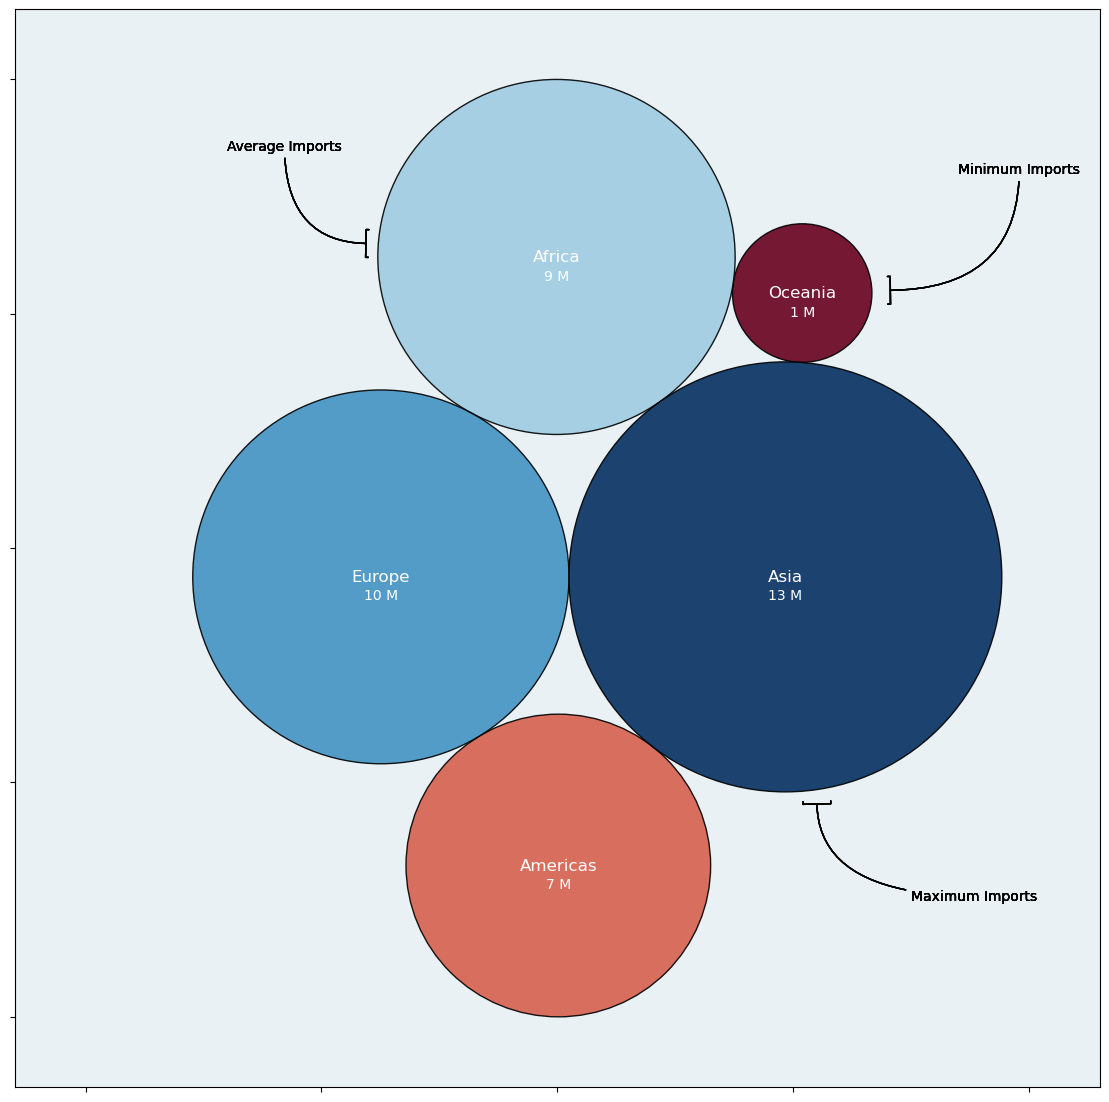

In [515]:
fig, ax = plt.subplots(figsize=(14,14))
ax.set_facecolor('#e9f1f5')
cc_pre = cc_pre.groupby('Continent').agg({'Trade Value (US$)':'sum'}) ; cc_pre.reset_index(inplace=True)
cc_pre = cc_pre[cc_pre['Trade Value (US$)'] >= 0]
cc_pre.sort_values(by='Trade Value (US$)', inplace=True)

labels = cc_pre['Continent']
circles = circlify.circlify(
    cc_pre['Trade Value (US$)'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1))

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,)
    for circle in circles)
plt.xlim(-lim-0.15, lim+0.15)
plt.ylim(-lim-0.15, lim+0.15)
ax.set(xticklabels=[],yticklabels=[])
# print circles
for circle, label, color, val in zip(circles, labels, circle_color,cc_pre['Trade Value (US$)']) :
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y),  r,alpha=0.9, linewidth=1, facecolor=color, edgecolor='black',))
    plt.annotate(label, (x,y ) ,va='center', ha='center',color='white', fontsize=12)# bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
    plt.annotate(millify(val), (x,y-0.04 ) ,va='center', ha='center',color='white', fontsize=10)
    plt.annotate('Minimum Imports', xy=(0.7,0.55), xytext=(0.85, 0.8),arrowprops=dict(arrowstyle="-[", connectionstyle="angle3,angleA=90,angleB=0"))
    plt.annotate('Maximum Imports', xy=(0.55,-0.54), xytext=(0.75, -0.75),arrowprops=dict(arrowstyle="-[",connectionstyle="angle3,angleA=180,angleB=90"))
    plt.annotate('Average Imports', xy=(-0.40,0.65), xytext=(-0.70, 0.85),arrowprops=dict(arrowstyle="-[",connectionstyle="angle3,angleA=90,angleB=180"))

## Post 2014 Exports

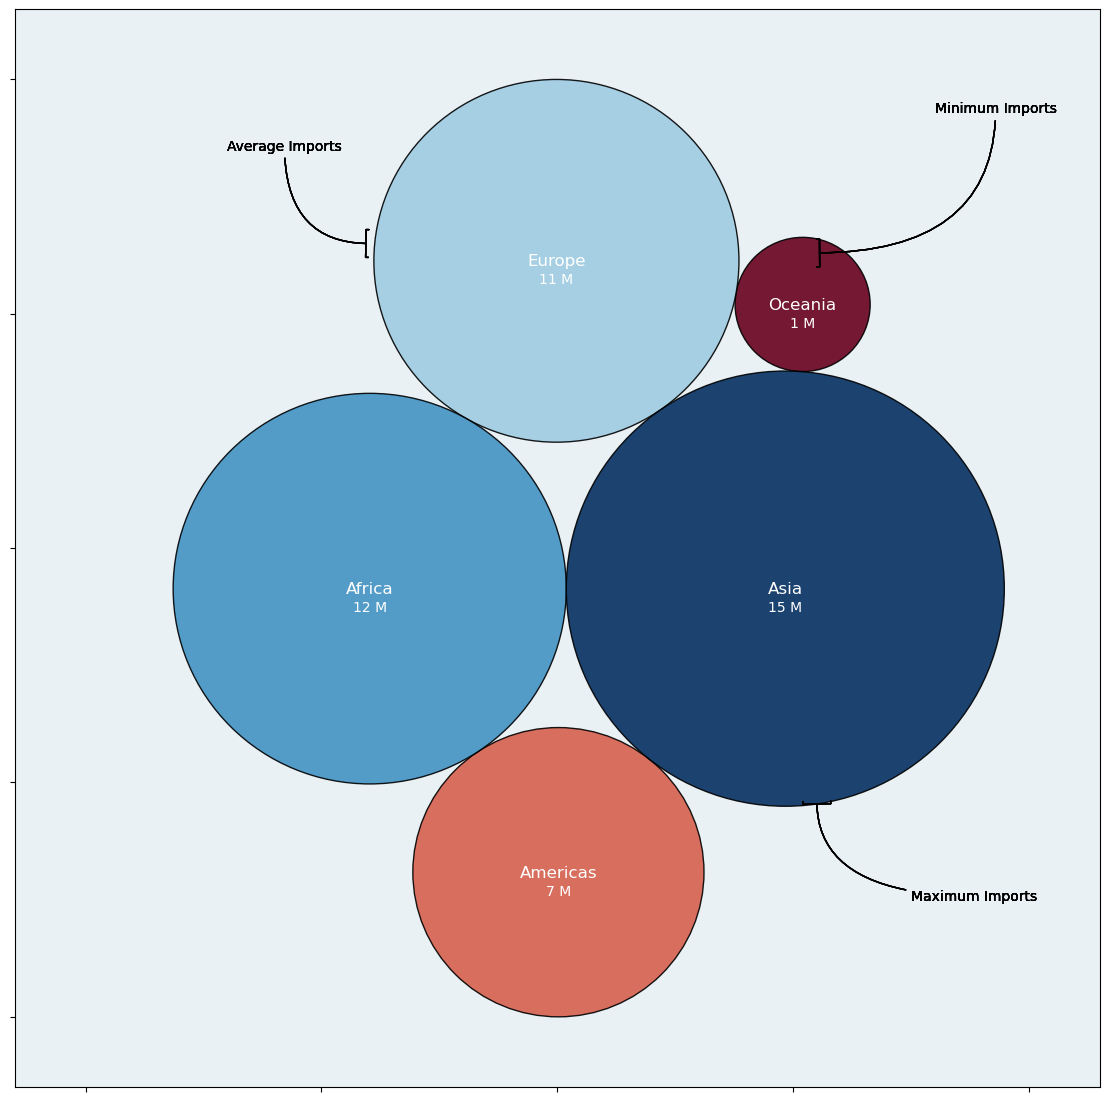

In [517]:
fig, ax = plt.subplots(figsize=(14,14))
ax.set_facecolor('#e9f1f5')
cc_post = cc_post.groupby('Continent').agg({'Trade Value (US$)':'sum'}) ; cc_post.reset_index(inplace=True)
cc_post = cc_post[cc_post['Trade Value (US$)'] >= 0]
cc_post.sort_values(by='Trade Value (US$)', inplace=True)

labels = cc_post['Continent']
circles = circlify.circlify(
    cc_post['Trade Value (US$)'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1))

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,)
    for circle in circles)
plt.xlim(-lim-0.15, lim+0.15)
plt.ylim(-lim-0.15, lim+0.15)
ax.set(xticklabels=[],yticklabels=[])
# print circles
for circle, label, color, val in zip(circles, labels, circle_color,cc_post['Trade Value (US$)']) :
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y),  r,alpha=0.9, linewidth=1, facecolor=color, edgecolor='black',))
    plt.annotate(label, (x,y ) ,va='center', ha='center',color='white', fontsize=12)# bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
    plt.annotate(millify(val), (x,y-0.04 ) ,va='center', ha='center',color='white', fontsize=10)
    plt.annotate('Minimum Imports', xy=(0.55,0.63), xytext=(0.8, 0.93),arrowprops=dict(arrowstyle="-[", connectionstyle="angle3,angleA=90,angleB=0"))
    plt.annotate('Maximum Imports', xy=(0.55,-0.54), xytext=(0.75, -0.75),arrowprops=dict(arrowstyle="-[",connectionstyle="angle3,angleA=180,angleB=90"))
    plt.annotate('Average Imports', xy=(-0.40,0.65), xytext=(-0.70, 0.85),arrowprops=dict(arrowstyle="-[",connectionstyle="angle3,angleA=90,angleB=180"))

In [519]:
total = df1.copy()
total = total.groupby(['Continent','Partner ISO']).agg({'Trade Value (US$)':'sum'}) ; total.reset_index(inplace=True)
total = total.sort_values(by='Trade Value (US$)', ascending=False) ; total = total[total['Trade Value (US$)'] >= 0]
top5 = total.head(6)
top5 = top5['Partner ISO']

### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;">III. Break down of Trade by Continent & Country 🌎</div>
The following map showcases the overall export so far to each country, for every continent.  
**.: Scale :.**  
<span style="background-color: #87beda">High t</span><span style="background-color: #f09b7a">o Low</span>  
🟦   >  🟥
___

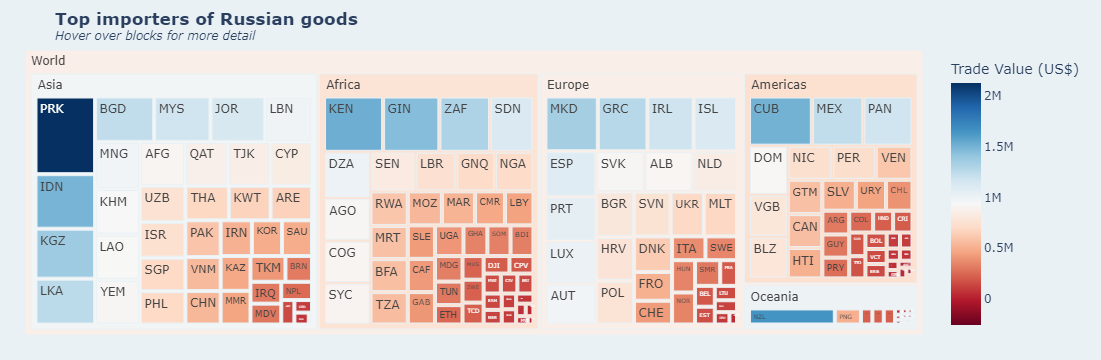

In [521]:
# Tree map
fig = px.treemap(total, path=[px.Constant('World'), 'Continent', 'Partner ISO'], values='Trade Value (US$)', color='Trade Value (US$)', hover_data=['Partner ISO'],
                  color_continuous_scale='RdBu',color_continuous_midpoint=np.percentile(total['Trade Value (US$)'],85), template='plotly_white')
fig.update_layout(font_family="verdana", font_size=12, paper_bgcolor="#e9f1f5",plot_bgcolor="#e9f1f5",title='<b>Top importers of Russian goods</b> <br><sup><i>Hover over blocks for more detail</i></sup>',)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;">IV. Top Russian trading partners of all time 🕰️</div>
Russias highest importer of goods lie within the same continent, i.e <b>Asia</b>.  Highest being <span style="background-color: #87beda">North-Korea</span> followed by New Zealand and Kenya  
**.: Scale :.**  
<span style="background-color: #87beda">High t</span><span style="background-color: #f09b7a">o Low</span>  
🟦   >  🟥
___

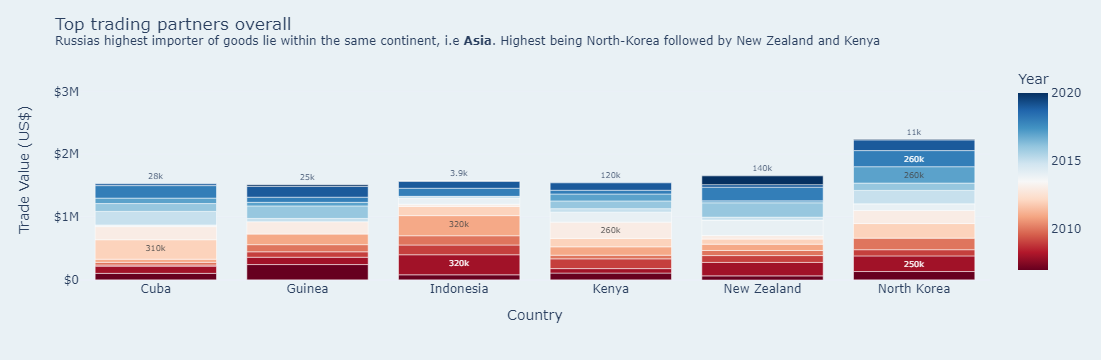

In [523]:
t5 = df1.groupby(['Year','Partner ISO']).agg({'Trade Value (US$)':'sum'}) ; t5.reset_index(inplace=True)
t5 = t5[t5['Partner ISO'].isin(top5)]

fig = px.bar(t5, x='Partner ISO', y='Trade Value (US$)', color='Year', text='Trade Value (US$)',template='plotly_white', color_continuous_scale='RdBu', labels={'Partner ISO':'Country'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(font_family="verdana",font_size=12,paper_bgcolor="#e9f1f5",plot_bgcolor="#e9f1f5",title='Top trading partners overall<br><sup>Russias highest importer of goods lie within the same continent, i.e <b>Asia</b>.'
+' Highest being North-Korea followed by New Zealand and Kenya</sup>',uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_yaxes(tickprefix="$")
fig.update_layout(yaxis_range=[0,3500000],
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['CUB','GIN','IDN','KEN','NZL','PRK'],
        ticktext = ['Cuba', 'Guinea', 'Indonesia', 'Kenya', 'New Zealand', 'North Korea']))
fig.show()

### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;">V. Trade Density spread throughout all Commodities | Kernel Density of Commodity Code w/ref Trade Value  </div>
Across 100 Commodities of Aggregate level II, Most Frequently traded commodities lie between <span style="background-color: #87beda">40 to 80</span>  
Major contribution by **Chemicals - Medicinal & Pharmaceutical products - Iron & Steel - Machinery - Road Vehicles** commodities
___

In [525]:
# KDE for all commodities

tt = df1.copy()
tt = tt.groupby(['Commodity Code',]).agg({'Trade Value (US$)':'sum'}) ; tt.reset_index(inplace=True)
sns.jointplot(data=tt, x='Commodity Code', y='Trade Value (US$)', kind='kde',  cmap='Blues', shade=True, thresh=0, height=10, fill=True)

NotImplementedError: agg function failed [how->sum,dtype->int16]

### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;">VI. Trade Density for overall Top-5 Commodities</div>
 
<table style="width:50%">
    <style>
table, th, td {
  border:1px solid black;
}
</style> 
  <tr>
    <th>Country</th>
    <th>Highest</th>
  </tr>
  <tr>
    <td>India</td>
    <td>Footwear</td>
  </tr>
  <tr>
    <td>USA</td>
    <td>Beverages</td>
  </tr>
    <tr>
    <td>China</td>
    <td>Dyeing, Tanning and Coloring meterials</td>
  </tr>
    <tr>
    <td>Japan</td>
    <td>Specialized Machinery</td>
  </tr>
    <tr>
    <td>Saudi Arabia</td>
    <td>Specialized Machinery</td>
  </tr>
    <tr>
    <td>Germany</td>
    <td>Specialized Machinery</td>
  </tr>
</table>  


___

In [ ]:
top_com = df1.copy() ; tc = top_com
top_com = top_com.groupby(['Commodity Code']).agg({'Trade Value (US$)':'sum'}) ; top_com.reset_index(inplace=True)
top_com.sort_values(by='Trade Value (US$)', inplace=True, ascending=False)
top_com = top_com['Commodity Code'].head(5)

fig, ax = plt.subplots(3,2,figsize=(18,17))
countries = ['IND','USA','CHN','JPN','SAU','DEU']
f6_pallet = ['#67001f','#d6604d', '#9fcce2', '#4393c3','#053061']
fig.suptitle('Density of Top-5 Commodities amongst different Countries')
labels=['Footwear','Beverages','Dyeing, Tanning and Coloring meterials','Specialized Machinery','Telco,Sound recording/reproducing Equipment']
fig.patch.set_facecolor('#e9f1f5')
count = 0
for i in range(3):
    for j in range(2):
        f6 = df[(df['Partner ISO'] == countries[count]) & (df['Commodity Code'].isin(top_com))]
        f6 = f6.groupby(['Year','Commodity Code']).agg({'Trade Value (US$)':'sum'}) ;f6.reset_index(inplace=True)
        a = sns.kdeplot(data=f6, ax=ax[i,j], x='Trade Value (US$)', hue='Commodity Code', fill=True, alpha=0.4, palette = f6_pallet, legend=False,)
        a.set(xticklabels=[],yticklabels=[])
        ax[i,j].set_title(countries[count]) ; count = count + 1
fig.legend([ax], labels=labels, loc='upper left', ncol=5, mode='expand',borderaxespad=4,)

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4.1 <span style='color:#CDA63A'>|</span> Top importers of popular commodities</div>

### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;">VII (A) Top 10 Countries importing Organic, In-Organic Chemicals 🧪 & Pharmaceutical materials 💊 💉</div>
**Top 10** Countries have a <span style="background-color: #87beda">mean import value of 80,000 USD</span> whereas the overall mean import value for the  <span style="background-color: #f09b7a">world lies around 2000 USD</span>
___

In [ ]:
five = df[df['Commodity Code'].isin([51,52, 54])] ; f2 = five
five = five.groupby(['Partner ISO']).agg({'Trade Value (US$)':'sum'}) ; five.reset_index(inplace=True)
po = five.sort_values(by='Trade Value (US$)', ascending=False).head(10)

po = po['Partner ISO']
f2 = f2[f2['Partner ISO'].isin(po)]

f2 = f2.groupby(['Partner ISO','Commodity Code']).agg({'Trade Value (US$)':'sum'}) ; f2.reset_index(inplace=True)
avg = np.mean(f2['Trade Value (US$)'])

fig = px.histogram(f2, x='Partner ISO', y='Trade Value (US$)', barmode='group', color='Commodity Code', text_auto='Trade Value (US$)',template='plotly_white',  color_discrete_sequence=cmap_chem)
fig.update_traces(textposition='outside')
fig.update_yaxes(tickprefix="$", showgrid=True)
fig.update_layout(font_family="verdana",font_size=12,paper_bgcolor="#e9f1f5",plot_bgcolor="#e9f1f5",
                    title='Top 10 Countries importing Organic, In-Organic & Pharmaceutical materials <br><sup>Mean import value of $80,000'
                    +' | Highest Importers of Organic and In-Organic chemicals - Pharmaceuticals</sup>')
fig.update_layout(uniformtext_minsize=5, uniformtext_mode='hide', showlegend=False)
fig.add_shape(
    type='line', line_color='salmon', line_width=1, opacity=1, line_dash='dot',
    x0=0, x1=1, xref='paper', y0=avg, y1=avg, yref='y')
fig.add_annotation(text='<i>avg '+str(avg)[:2]+'k', x='AGO', y=80000,)

fig.add_annotation(text='Pharmaceuticals', x='YEM', y=174000, arrowhead=1, showarrow=True)
fig.add_annotation(text='Organic Chemicals', x='DOM', y=160000, arrowhead=1, showarrow=True)
fig.add_annotation(text='In-organic Chemicals', x='LBN', y=135000, arrowhead=1, showarrow=True)
fig.update_layout(yaxis_range=[0,250000],
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['AGO','ARE','CHE','DOM','EGY','GTM','IRN','LBN','SGP','YEM'],
        ticktext = ['Angola','United Arab Emirates','Switzerland','Dominican Republic','Egypt','Guatemala','Iran','Lebanon','Singapore','Yemen']))
fig.show()

### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;">VII (B) Electricity  🔌 💡</div>
**Kazakisthan** and **China** have been highest importers of Russian Electricity
___

In [ ]:
# 35	ELECTRIC CURRENT
ec = df1[df1['Commodity Code'].isin([35])]
ec = ec.groupby(['Partner ISO']).agg({'Trade Value (US$)':'sum'}) ; ec.reset_index(inplace=True)
fig = px.bar(ec, y='Partner ISO', x='Trade Value (US$)', text='Trade Value (US$)',template='plotly_white',color_continuous_scale=cmap_ec, color='Trade Value (US$)')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',xaxis_range=[-95000,100000],)
fig.update_layout(font_family="verdana",font_size=12,paper_bgcolor="#e9f1f5",plot_bgcolor="#e9f1f5",
                    title='Top Importers of electricity<br><sup>Majority of the trade is being done with neighbouring countries and Islands | </sup>')
fig.add_annotation(text='Highest Importer of Electric Current', x=70000, y='LTU', arrowhead=1, showarrow=True)
fig.add_annotation(text='Lowest Importer of Electric Current', x=13000, y='MNG', arrowhead=1, showarrow=False)
fig.add_shape(
    type='line', line_color='salmon', line_width=1, opacity=1, line_dash='dot',
    x0=36650, x1=36650, xref='x', y0='AZE', y1='UKR', yref='y', )
fig.add_annotation(text='mean 36K', x='42000', y='FIN',showarrow=False)

fig.show()

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4.2 <span style='color:#CDA63A'>|</span> World Distribution</div>

# <div style="font-family: Trebuchet MS; background-color: #d6604d; color: #FFFFFF; padding: 12px; line-height: 1.5;"> World Distribution 🗺️</div>
### <div style="font-family: Trebuchet MS; background-color: #87beda; color: #FFFFFF; padding: 12px; line-height: 1.5;">Distribution of Popular russian commodities on World Map</div>

<ol>
  <li>Apparels 👚 👓 </li>
  <li>Energy ⛽ 🛢️</li>
  <li>Beverages 🍺 ☕ 🍾</li>
</ol>   


**.: Scale :.**  
<span style="background-color: #87beda">High t</span><span style="background-color: #f09b7a">o Low</span>  
🟦   >  🟥

___

In [ ]:
# 83	TRAVEL GOODS, HANDBAGS AND SIMILAR CONTAINERS
# 84	ARTICLES OF APPAREL AND CLOTHING ACCESSORIES
# 85	FOOTWEAR
one = df[df['Commodity Code'].isin([83,84,85])]
one = one.groupby(['Partner ISO']).agg({'Trade Value (US$)':'sum'}) ; one.reset_index(inplace=True)
# 32	COAL, COKE AND BRIQUETTES
# 33	PETROLEUM, PETROLEUM PRODUCTS AND RELATED MATERIALS
# 34	GAS, NATURAL AND MANUFACTURED
two = df[df['Commodity Code'].isin([32,33,34])]
two = two.groupby(['Partner ISO']).agg({'Trade Value (US$)':'sum'}) ; two.reset_index(inplace=True)
# 11	BEVERAGES
# 12	TOBACCO AND TOBACCO MANUFACTURES
three = df[df['Commodity Code'].isin([11,12])]
three = three.groupby(['Partner ISO']).agg({'Trade Value (US$)':'sum'}) ; three.reset_index(inplace=True)

In [ ]:
Title = ['Top Importers of Fashionable Threads & Apparel<br><sup>Travel Goods, Footwear, Clothing apparel</sup>',
        'Top Importers of Energy materials<br><sup>Coal, Briquettes, Gas, Fuel</sup>',
        'Top Importers of Beverages<br><sup>Beverages, Tobacco, Tobacco manufactures</sup>',]
for x,y in zip([one,two,three],Title) :
    fig = px.choropleth(x,locations='Partner ISO', locationmode='ISO-3',color='Trade Value (US$)', color_continuous_scale='RdBu', color_continuous_midpoint=np.average(x['Trade Value (US$)']))
    fig.update_layout(font_family="verdana",font_size=12,title=y,paper_bgcolor="#e9f1f5",plot_bgcolor="#e9f1f5")
    fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    template= 'plotly',
) ; fig.show()

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> Conclusions</div>

# <div style="font-family: Trebuchet MS; color: #FFFFFF;"></div>
> *  For Organic/In-Organic Chemicals 🧪 & Pharmaceutical materials 💊 💉, **Top 10** Countries have a <span style="background-color: #87beda">mean import value of 80,000 USD</span> whereas the overall mean import value for the  <span style="background-color: #f09b7a">world lies around 2000 USD</span>  
> * The KDE Density for Top-5 valuable commodities being traded shows us that the World has a taste for Specialized machinery from Russia  
> * Across 100 Commodities of Aggregate level II, Most Frequently traded commodities lie between <span style="background-color: #87beda">40 to 80</span>,  Major contribution by **Chemicals - Medicinal & Pharmaceutical products - Iron & Steel - Machinery - Road Vehicles** commodities  
> * Russias highest importer of goods lie within the same continent, i.e <b>Asia</b>.  Highest being <span style="background-color: #87beda">North-Korea</span> followed by New Zealand and Kenya  
> * We can conclude that majority of exports are with neighbouring nations or nations within land reach ( transport methods not requiring Sea / Air methods ). A study by worldbank suggests 90% of the worlds cargo is 
Russia is able to maintain a **stable** trade value overall, The trade volumes have been in a **range** of <span style="background-color: #32CD32">5-8 Million USD</span>. Having a stable Trade <span style="background-color: #32CD32">ensures financial security</span> and helps the nations citizens choose from a variety of options.  
> * **Kazakisthan** and **China** have been highest importers of Russian Electricity  

In [ ]:
import joblib

# Save the model to a file
joblib.dump(russian-trade, 'russian-trade.pkl')
